# Keyword Problem - Genetic Algorithms

### Matheus Zaia

In [67]:
import timeit 

from ga_keyword import population_kw, individual_kw
from ga_keyword import population_fitness_kw
from ga_keyword import population_gene_mutation_kw
from ga_keyword import population_size_mutation_kw
from ga_keyword import population_size_adaptative_crossover_kw
from ga_keyword import roulette_selection_kw

## Problem 

As a general Genetic Algorithm (GA), we have a optimization question. Here, we have a keyword, represented by a list of characters, which includes upper and lower case letters and numbers, and varies from 1 to 30 characters. The objective of this problem is to design a GA to get to this keyword, or something close to it. 

The operators utilized were:
- Gene mutation: each individual has a certain probability of having one of its genes mutated. This could turn a solution like `['a', 'b', 'c']` into another one like `['a', '3', 'c']`.

- Size mutation: each individual has a certain probability of having its size changed. This operator adds random genes if the new size is bigger than the older one, and removes, iteratively, the last element from the solution if the new size is smaller than the original one.

- Size adapative crossover: two solutions combine to create two new solutions. We only apply this to different solutions that are different sizes, although there would be no problem adding a condition to use this to equally long solutions. We choose the smallest solution, and then exchange it with the beggining of the bigger solution. An example would be that `['a', 'b', 'c']` and `['1']` would return `['1', 'b', 'c']` and `['a']` as new solutions.

- Roulette selection: each individual is selected with probability proportional to its fitness. In this case, we have a function that needs to be minimized, i.e., the wheights are the inverse of the fitness.

The objective function to be minimized is the difference between two solutions. It can be written as:
\begin{equation}
f(A_n,B_m) = |n - m| +  \sum_{i = 1}^{n} \delta_i, \ \ \text{with } n\leq m 
\end{equation}
Here, $A_n$ is a solution with $n$ elements, and simillarly is $B_m$, and $\delta_i$ is a function that returns 0 if the $i$-th element from $A$ and $B$ are equal, and 1 otherwise. Note that $f(\cdot)$ accounts for both size differences and element wise differences.

## Simulations

Defining the constants of the problem, which can be modified.

In [68]:
INDIVIDUAL_SIZE = [1, 30]

GENERATIONS = 400
POPULATION_SIZE = 1000
GENE_MUTATION_RATE = 0.1
SIZE_MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.5

Generating the keyword `KW` and the initial population.

In [69]:
KW = individual_kw(INDIVIDUAL_SIZE)
population = population_kw(POPULATION_SIZE, INDIVIDUAL_SIZE)
hof = []
i = 0

start = timeit.default_timer()

while i < GENERATIONS:
    #Checking to see if we have the keyword
    if KW in population:
        print(f'The exact solution has been found in generation {i}.')
        solution = KW
        break
    
    #Fitness calculation and selection
    fitness = population_fitness_kw(population, KW)
    selected_population = roulette_selection_kw(population, fitness)
    
    #Crossover
    crossover_population = population_size_adaptative_crossover_kw(selected_population, CROSSOVER_RATE)
    
    #Gene and size mutation
    size_mutated_population = population_size_mutation_kw(crossover_population, INDIVIDUAL_SIZE, SIZE_MUTATION_RATE)
    gene_mutated_population = population_gene_mutation_kw(size_mutated_population, GENE_MUTATION_RATE)
    
    #Checking to see if we have the keyword
    if KW in population:
        print(f'The exact solution has been found in generation {i}.')
        solution = KW
        break
    
    #HOF atualization
    fitness = population_fitness_kw(gene_mutated_population, KW)
    best_fitness = min(fitness)
    index = fitness.index(best_fitness)
    best_individual = gene_mutated_population[index]
    hof.append(best_individual)
        
    #Restarting the population
    population = gene_mutated_population
    i += 1

end = timeit.default_timer()

The exact solution has been found in generation 366.


Printing some information about our simulation.

In [71]:
fitness = population_fitness_kw(hof, KW)
best_fitness = min(fitness)
index = fitness.index(best_fitness)
solution = hof[index]

solution_str = ''
keyword_str = ''

for i in solution:
    solution_str += i
    
for i in KW:
    keyword_str += i

print(f'solution: {solution_str}, len={len(solution_str)}')
print()
print(f'keyword: {keyword_str}, len={len(keyword_str)}')
print()
print(f'best_fitness={best_fitness}')
print()
print(f'runtime={(end - start):.3f}s')

solution: jcRt32BCVKA3x7ghdufPNcCQ, len=24

keyword: jcRt32BCVKA3x7ghdufPNcCQ, len=24

best_fitness=0

runtime=8.066s


## Statistics

Lastly, we will simulate 100 keywords, and calculate some statistics for the performance of our GA. 

In [64]:
KEYWORDS = [individual_kw(INDIVIDUAL_SIZE) for _ in range(100)]
SOLUTIONS = []
FITNESS = []
RUNTIME = []

for KW in KEYWORDS:
    population = population_kw(POPULATION_SIZE, INDIVIDUAL_SIZE)
    hof = []
    i = 0

    start = timeit.default_timer()

    while i < GENERATIONS:
        #Checking to see if we have the keyword
        if KW in population:
            SOLUTIONS.append(KW)
            FITNESS.append(0)
            break

        #Fitness calculation and selection
        fitness = population_fitness_kw(population, KW)
        selected_population = roulette_selection_kw(population, fitness)

        #Crossover
        crossover_population = population_size_adaptative_crossover_kw(selected_population, CROSSOVER_RATE)

        #Gene and size mutation
        size_mutated_population = population_size_mutation_kw(crossover_population, INDIVIDUAL_SIZE, SIZE_MUTATION_RATE)
        gene_mutated_population = population_gene_mutation_kw(size_mutated_population, GENE_MUTATION_RATE)

        #Checking to see if we have the keyword
        if KW in population:
            SOLUTIONS.append(KW)
            FITNESS.append(0)
            break

        #HOF atualization
        fitness = population_fitness_kw(gene_mutated_population, KW)
        best_fitness = min(fitness)
        index = fitness.index(best_fitness)
        best_individual = gene_mutated_population[index]
        hof.append(best_individual)

        #Restarting the population
        population = gene_mutated_population
        i += 1

    end = timeit.default_timer()
    
    if KW not in population:
        SOLUTIONS.append(best_individual)
        FITNESS.append(best_fitness)
    
    RUNTIME.append(end - start)

In [77]:
runtime_mean = sum(RUNTIME) / len(RUNTIME)
runtime_std = sum([(i - runtime_mean)**2 for i in RUNTIME]) * (1 / (len(RUNTIME)))

fitness_mean = sum(FITNESS) / len(FITNESS)
fitness_std = sum([(i - fitness_mean)**2 for i in FITNESS]) * (1 / (len(FITNESS)))

In [78]:
print(f'The mean runtime was {runtime_mean:.3f}s +- {runtime_std:.3f}s')
print()
print(f'The mean fitness was {fitness_mean:.3f} +- {fitness_std:.3f}')

The mean runtime was 4.144s +- 11.289s

The mean fitness was 1.980 +- 22.220


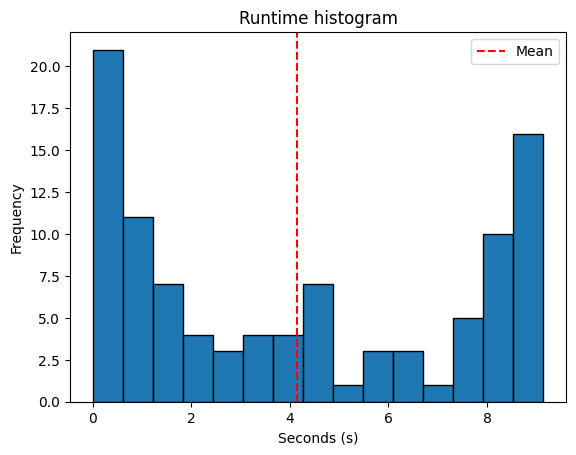

In [98]:
import matplotlib.pyplot as plt

plt.hist(RUNTIME, bins=15, edgecolor='k')
plt.axvline(runtime_mean, linestyle='--', color='red', label='Mean')
plt.xlabel('Seconds (s)')
plt.ylabel('Frequency')
plt.title('Runtime histogram')
plt.legend()
plt.show()

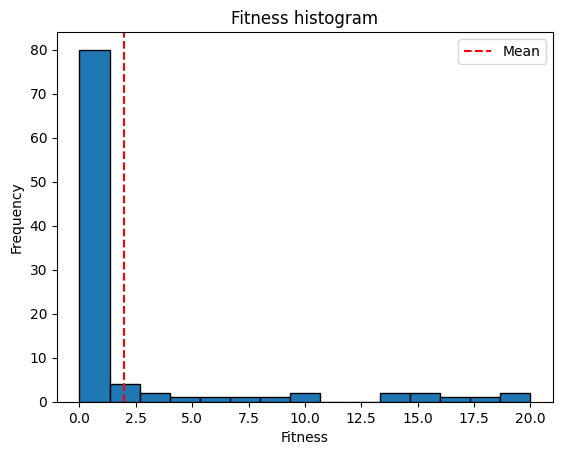

In [99]:
plt.hist(FITNESS, bins=15, edgecolor='k')
plt.axvline(fitness_mean, linestyle='--', color='red', label='Mean')
plt.xlabel('Fitness')
plt.ylabel('Frequency')
plt.title('Fitness histogram')
plt.legend()
plt.show()